# Dimensionality Reduction

In [6]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

X_iris = iris.drop('species', axis=1)
print(X_iris.shape)
y_iris = iris['species']
print(y_iris.shape)
print(X_iris[0:5])

(150, 4)
(150,)
   sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2


In [2]:
from sklearn.decomposition import PCA              # 1. Choose the model class
model = PCA(n_components=2)                        # 2. Instantiate the model with hyperparameters
model.fit(X_iris)                                  # 3. Fit to data. Notice y is not specified!
X_2D = model.transform(X_iris)                     # 4. Transform the data to two dimensions

In [5]:
print(X_2D[0:5])
print(X_2D.shape)

[[-2.68412563  0.31939725]
 [-2.71414169 -0.17700123]
 [-2.88899057 -0.14494943]
 [-2.74534286 -0.31829898]
 [-2.72871654  0.32675451]]
(150, 2)


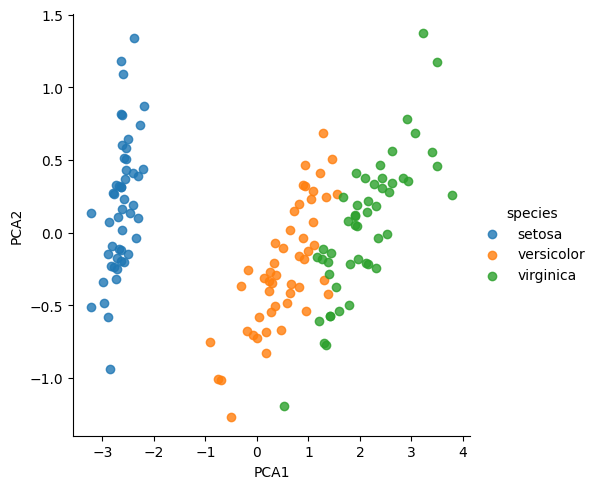

In [10]:
iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]
sns.lmplot(x="PCA1", y="PCA2", hue='species', data=iris, fit_reg=False)

# Clustering

In [13]:
from sklearn import mixture                                                         # 1. Choose the model class
model = mixture.GaussianMixture(n_components=3, covariance_type='full')             # 2. Instantiate the model w/ hyperparameters
model.fit(X_iris)                                                                   # 3. Fit to data. Notice y is not specified!
y_gmm = model.predict(X_iris)                                                       # 4. Determine cluster labels

0      2
1      2
2      2
3      2
4      2
      ..
145    1
146    1
147    1
148    1
149    1
Name: cluster, Length: 150, dtype: int64


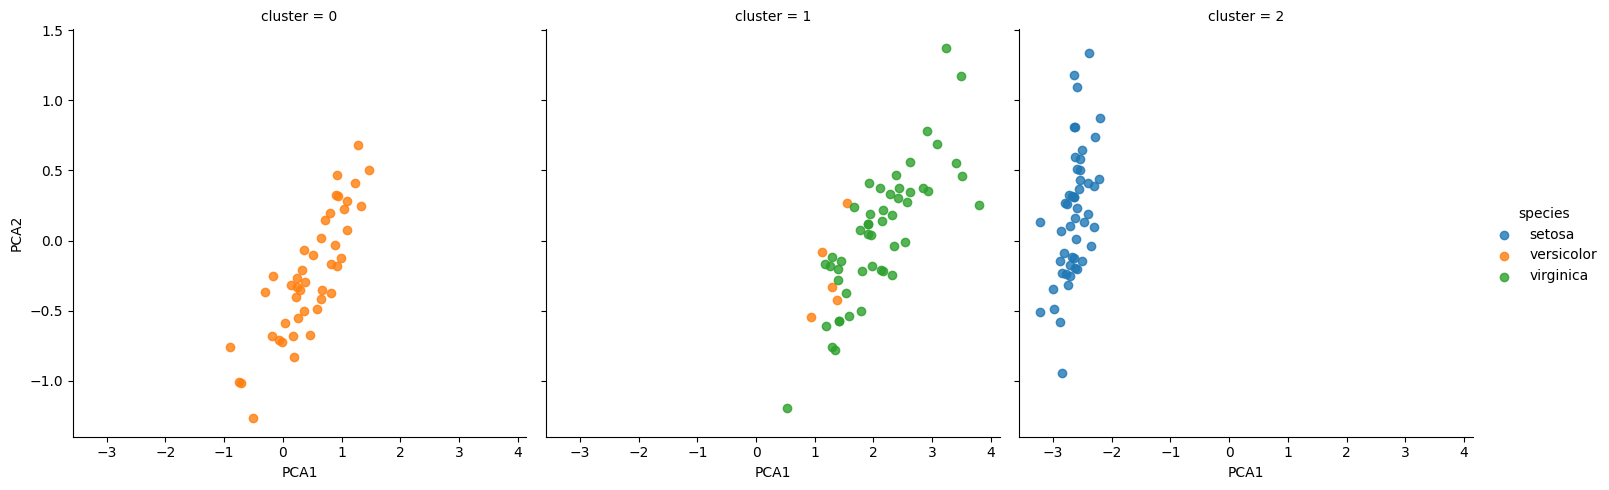

In [22]:
iris['cluster'] = y_gmm
print(iris['cluster'])
sns.lmplot(x="PCA1", y="PCA2", data=iris, hue='species',
               col='cluster', fit_reg=False);

## K-means Clustering

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [24]:
kmeans = KMeans(n_clusters=3, random_state=0)
print(kmeans)

KMeans(n_clusters=3, random_state=0)


In [26]:
clusters = kmeans.fit_predict(X_iris)
print(clusters)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


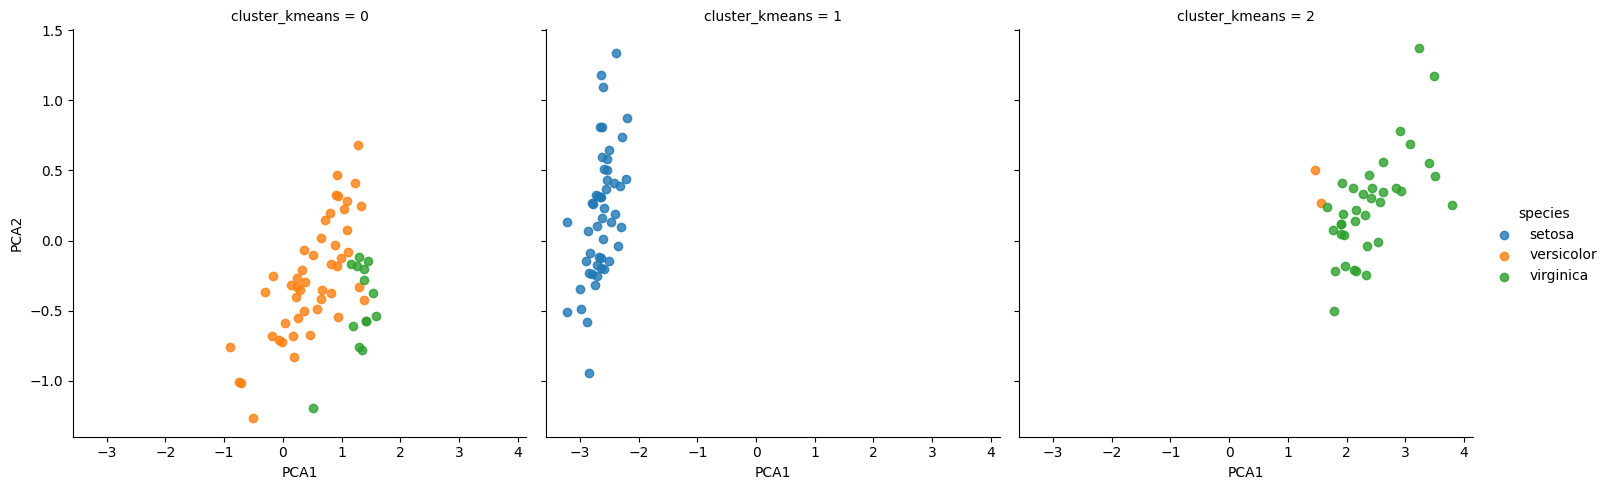

In [27]:
iris['cluster_kmeans'] = clusters
sns.lmplot(x="PCA1", y="PCA2", data=iris, hue='species',
               col='cluster_kmeans', fit_reg=False);